In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing:
* Handle missing values (if any) using appropriate techniques.
* Encode categorical features into numerical format.
* Split the dataset into training, validation, and testing sets.
* Consider techniques to handle imbalanced data (if necessary).


In [36]:
# Load the dataset
df = pd.read_csv('synthetic_customer_data.csv')
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,44,Female,Month-to-month,120.769391,5678.486949,No,Fiber optic,47,No,Mailed check,No,120.818871,5676.161357
1,2,38,Male,Month-to-month,62.208365,4265.407596,No,Fiber optic,69,No,Bank transfer,No,61.817501,4292.377176
2,3,46,Female,Two year,71.061143,1626.640349,Yes,DSL,24,Yes,Credit card,No,67.776681,1705.467420
3,4,55,Female,Month-to-month,37.398676,2639.984014,No,DSL,71,Yes,Mailed check,No,37.182873,2655.305972
4,5,37,Female,Month-to-month,46.861917,1541.051431,Yes,Fiber optic,34,Yes,Electronic check,No,45.325042,1593.305195


In [37]:
# Handling missing values
# If there are missing values, you can either drop them or fill them with appropriate values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CustomerID               0
Age                      0
Gender                   0
ContractType             0
MonthlyCharges           0
TotalCharges             0
TechSupport              0
InternetService          0
Tenure                   0
PaperlessBilling         0
PaymentMethod            0
Churn                    0
AverageMonthlyCharges    0
CustomerLifetimeValue    0
dtype: int64


In [38]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'ContractType', 'TechSupport', 'InternetService', 
                                          'PaperlessBilling', 'PaymentMethod'], drop_first=True)
df_encoded.head()

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,Churn,AverageMonthlyCharges,CustomerLifetimeValue,Gender_Male,ContractType_One year,ContractType_Two year,TechSupport_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,44,120.769391,5678.486949,47,No,120.818871,5676.161357,False,False,False,False,True,False,False,False,False,True
1,2,38,62.208365,4265.407596,69,No,61.817501,4292.377176,True,False,False,False,True,False,False,False,False,False
2,3,46,71.061143,1626.640349,24,No,67.776681,1705.467420,False,False,True,True,False,False,True,True,False,False
3,4,55,37.398676,2639.984014,71,No,37.182873,2655.305972,False,False,False,False,False,False,True,False,False,True
4,5,37,46.861917,1541.051431,34,No,45.325042,1593.305195,False,False,False,True,True,False,True,False,True,False


In [39]:
# Separate features and target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [40]:
scaler = StandardScaler()
numerical_features = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure', 
                      'AverageMonthlyCharges', 'CustomerLifetimeValue']

df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head()

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,Churn,AverageMonthlyCharges,CustomerLifetimeValue,Gender_Male,ContractType_One year,ContractType_Two year,TechSupport_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0.447589,1.663891,1.599928,0.515050,No,1.691024,1.621125,False,False,False,False,True,False,False,False,False,True
1,2,-0.163788,-0.306977,0.866543,1.574606,No,-0.317108,0.894696,True,False,False,False,True,False,False,False,False,False
2,3,0.651381,-0.009038,-0.502971,-0.592667,No,-0.114285,-0.463324,False,False,True,True,False,False,True,True,False,False
3,4,1.568447,-1.141946,0.022952,1.670929,No,-1.155556,0.035302,False,False,False,False,False,False,True,False,False,True
4,5,-0.265684,-0.823461,-0.547392,-0.111051,No,-0.878434,-0.522204,False,False,False,True,True,False,True,False,True,False


In [41]:
# Split the dataset into training (80%), validation (10%), and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [42]:
df_encoded['Tenure_MonthlyCharges'] = df_encoded['Tenure'] * df_encoded['MonthlyCharges']

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [43]:
# Display the shapes of the splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4836, 17)
Validation set shape: (1612, 17)
Test set shape: (1612, 17)


## Feature Engineering

In [44]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
df_encoded['customer_lifetime_value'] = df_encoded['Tenure'] * df_encoded['MonthlyCharges']

df_encoded['average_monthly_charges'] = df_encoded['TotalCharges'] / (df_encoded['Tenure'] + 1)

df_encoded['churn_duration'] = df_encoded['Tenure'].apply(lambda x: 'Short' if x < 12 else ('Medium' if x < 24 else 'Long'))
df_encoded = pd.get_dummies(df_encoded, columns=['churn_duration'], drop_first=True)

In [46]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X = df_encoded[['MonthlyCharges', 'Tenure']]
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(['MonthlyCharges', 'Tenure'])
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

df_encoded = df_encoded.drop(columns=['MonthlyCharges', 'Tenure'])
df_encoded = pd.concat([df_encoded, X_poly_df], axis=1)

In [47]:
bins = [0, 30, 60, 90, 120]
labels = ['Low', 'Medium', 'High', 'Very High']
df_encoded['monthly_charges_bin'] = pd.cut(df_encoded['MonthlyCharges'], bins=bins, labels=labels)
df_encoded = pd.get_dummies(df_encoded, columns=['monthly_charges_bin'], drop_first=True)

In [48]:
df_encoded.isna().sum()

CustomerID                        0
Age                               0
TotalCharges                      0
Churn                             0
AverageMonthlyCharges             0
CustomerLifetimeValue             0
Gender_Male                       0
ContractType_One year             0
ContractType_Two year             0
TechSupport_Yes                   0
InternetService_Fiber optic       0
InternetService_No                0
PaperlessBilling_Yes              0
PaymentMethod_Credit card         0
PaymentMethod_Electronic check    0
PaymentMethod_Mailed check        0
Tenure_MonthlyCharges             0
customer_lifetime_value           0
average_monthly_charges           0
MonthlyCharges                    0
Tenure                            0
MonthlyCharges Tenure             0
monthly_charges_bin_Medium        0
monthly_charges_bin_High          0
monthly_charges_bin_Very High     0
dtype: int64

In [49]:
numeric_columns = df_encoded.select_dtypes(include=['number']).columns

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

df_encoded.drop(columns=['CustomerID'], inplace=True)
df_encoded.head()

,Age,TotalCharges,Churn,AverageMonthlyCharges,CustomerLifetimeValue,Gender_Male,ContractType_One year,ContractType_Two year,TechSupport_Yes,InternetService_Fiber optic,...,PaymentMethod_Mailed check,Tenure_MonthlyCharges,customer_lifetime_value,average_monthly_charges,MonthlyCharges,Tenure,MonthlyCharges Tenure,monthly_charges_bin_Medium,monthly_charges_bin_High,monthly_charges_bin_Very High
0,0.447589,1.599928,No,1.691024,1.621125,False,False,False,False,True,...,True,0.838124,0.838124,0.095629,1.663891,0.515050,0.838124,False,False,False
1,-0.163788,0.866543,No,-0.317108,0.894696,True,False,False,False,True,...,False,-0.485846,-0.485846,-0.012735,-0.306977,1.574606,-0.485846,False,False,False
2,0.651381,-0.502971,No,-0.114285,-0.463324,False,False,True,True,False,...,False,-0.003096,-0.003096,-0.249413,-0.009038,-0.592667,-0.003096,False,False,False
3,1.568447,0.022952,No,-1.155556,0.035302,False,False,False,False,False,...,True,-1.893172,-1.893172,-0.062135,-1.141946,1.670929,-1.893172,False,False,False
4,-0.265684,-0.547392,No,-0.878434,-0.522204,False,False,False,True,True,...,False,0.081941,0.081941,-0.156177,-0.823461,-0.111051,0.081941,False,False,False


## Model Building

In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [51]:
# split testing, set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(class_weight='balanced', max_iter=100)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.53      0.64      1206
           1       0.20      0.48      0.28       294

    accuracy                           0.52      1500
   macro avg       0.50      0.50      0.46      1500
weighted avg       0.69      0.52      0.57      1500

Confusion Matrix:
 [[636 570]
 [153 141]]


In [52]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1206
           1       0.20      0.22      0.21       294

    accuracy                           0.67      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.68      0.67      0.68      1500

Confusion Matrix:
 [[939 267]
 [229  65]]


In [53]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.71      0.76      1206
           1       0.19      0.28      0.23       294

    accuracy                           0.63      1500
   macro avg       0.50      0.50      0.49      1500
weighted avg       0.68      0.63      0.65      1500

Confusion Matrix:
 [[862 344]
 [211  83]]


In [54]:
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters for Decision Tree:", grid_search.best_params_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}


## Model Evaluation

In [55]:
print("Logistic Regression Evaluation:")
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", log_reg_auc)

Logistic Regression Evaluation:
ROC-AUC Score: 0.49915530059453295


In [56]:
print("Decision Tree Evaluation:")
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", dt_auc)

Decision Tree Evaluation:
ROC-AUC Score: 0.5248530589681977


In [27]:
print("Random Forest Evaluation:")
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", rf_auc)

Random Forest Evaluation:
ROC-AUC Score: 0.49383186110265


In [57]:
# Logistic Regression Coefficients (Feature Importance)
if hasattr(log_reg, 'coef_'):
    print("Logistic Regression Coefficients:")
    feature_importance_log = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
    feature_importance_log = feature_importance_log.sort_values(by='Coefficient', ascending=False)
    print(feature_importance_log)

Logistic Regression Coefficients:
          Feature  Coefficient
0  MonthlyCharges     0.092831
1          Tenure    -0.038843


In [58]:
# Decision Tree Feature Importance
if hasattr(dt, 'feature_importances_'):
    print("\nDecision Tree Feature Importance:")
    feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
    feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)
    print(feature_importance_dt)


Decision Tree Feature Importance:
          Feature  Importance
0  MonthlyCharges    0.594031
1          Tenure    0.405969


In [59]:
# Random Forest Feature Importance
if hasattr(rf, 'feature_importances_'):
    print("\nRandom Forest Feature Importance:")
    feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
    feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
    print(feature_importance_rf)


Random Forest Feature Importance:
          Feature  Importance
0  MonthlyCharges    0.605395
1          Tenure    0.394605


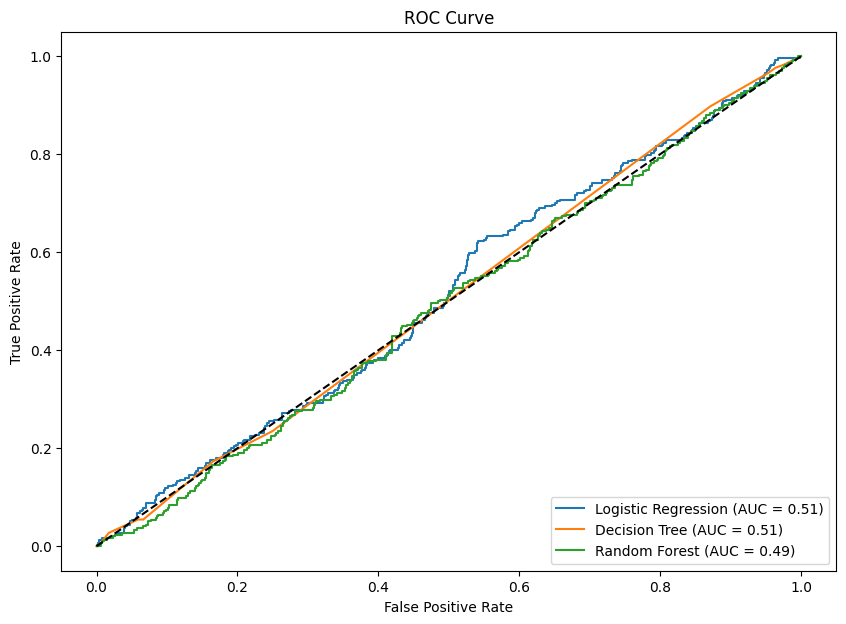

In [32]:
plt.figure(figsize=(10, 7))
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_auc))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

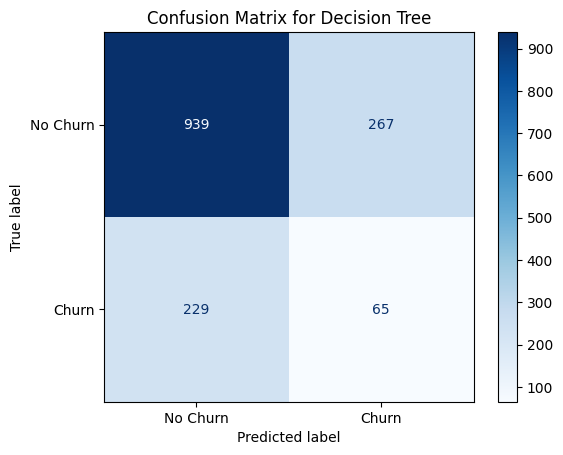

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

# Decision Tree confusion matrix
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, display_labels=['No Churn', 'Churn'], cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()
